In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Rescaling
import math
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [2]:

# Directory path (update this if needed)
data_dir = "/content/drive/MyDrive/DATASETS/Datasets_Bootcamp/Automating_Port_Operations_dataset"

# Create Training Dataset

# Editable Parameters
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=43,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode = 'categorical'
  )

# Create Validation Dataset

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=43,
  image_size=(img_height, img_width),
  batch_size=batch_size,
 label_mode = 'categorical'
  )

# Save Classes data before applying Normalization
num_classes = len(train_ds.class_names)
class_names = train_ds.class_names

print(f"Number of classes: {num_classes}")

# Apply normalization (Rescaling) to scale pixel values from [0, 255] to [0, 1]
normalization_layer = Rescaling(1./255)

# Normalize the datasets
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))



# Prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)



Found 1162 files belonging to 9 classes.
Using 930 files for training.
Found 1162 files belonging to 9 classes.
Using 232 files for validation.
Number of classes: 9


In [3]:
for images, labels in train_ds.take(1):
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")

Images shape: (32, 180, 180, 3)
Labels shape: (32, 9)


In [4]:
# Steps 1.4, 1.5 : Build and Compile CNN Model



model = Sequential([

  #layers.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, (3,3), padding='same', activation='relu',input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(pool_size = (2,2)),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size = (2,2)),
  layers.GlobalAveragePooling2D(),
  layers.Flatten(),


  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
## Compile Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','precision','recall'])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,041 (125.16 KB)

 Trainable params: 32,041 (125.16 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Check the shapes of your data
for images, labels in train_ds.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")

# Check model output shape
logits = model(images)
print(f"Model output shape: {logits.shape}")

Image batch shape: (32, 180, 180, 3)
Label batch shape: (32, 9)
Model output shape: (32, 9)


In [8]:
# Steps 1.6 : Train the Model

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 262ms/step - accuracy: 0.2679 - loss: 2.0336 - precision: 0.2954 - recall: 0.0132 - val_accuracy: 0.3017 - val_loss: 1.8103 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.3495 - loss: 1.7932 - precision: 0.3279 - recall: 0.0073 - val_accuracy: 0.3017 - val_loss: 1.8057 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.3513 - loss: 1.7924 - precision: 0.6660 - recall: 0.0231 - val_accuracy: 0.3017 - val_loss: 1.7784 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.3590 - loss: 1.7319 - precision: 0.7016 - recall: 0.0272 - val_accuracy: 0.2974 - val_loss: 1.7739 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.3653 - loss: 1.7246 - precision: 0.4336 - recall: 0.0223 - val_ac

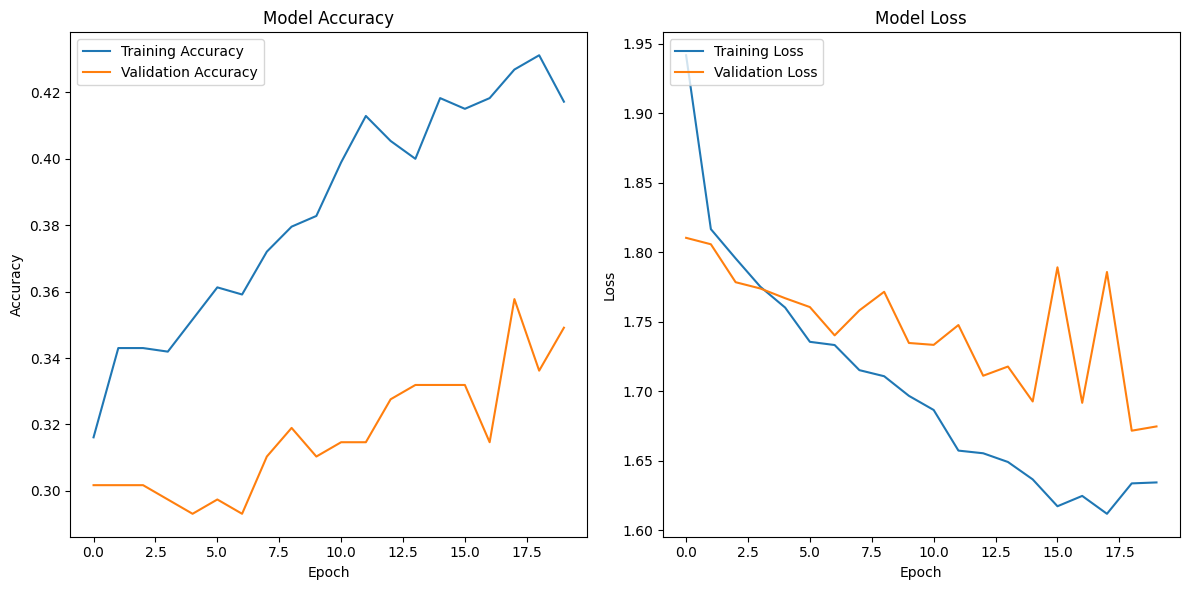

In [9]:
# Step 1.6 : Plot loss and accuracy

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [10]:
# Step 1.7 : Evaluate the model on the test data
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(val_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

# Get true and predicted labels for the test set
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred = model.predict(val_ds)
y_true_labels = np.argmax(y_true, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3630 - loss: 1.6237 - precision: 0.5471 - recall: 0.1147
Test Loss: 1.674634575843811
Test Accuracy: 0.34913793206214905
Test Precision: 0.5454545617103577
Test Recall: 0.12931033968925476
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


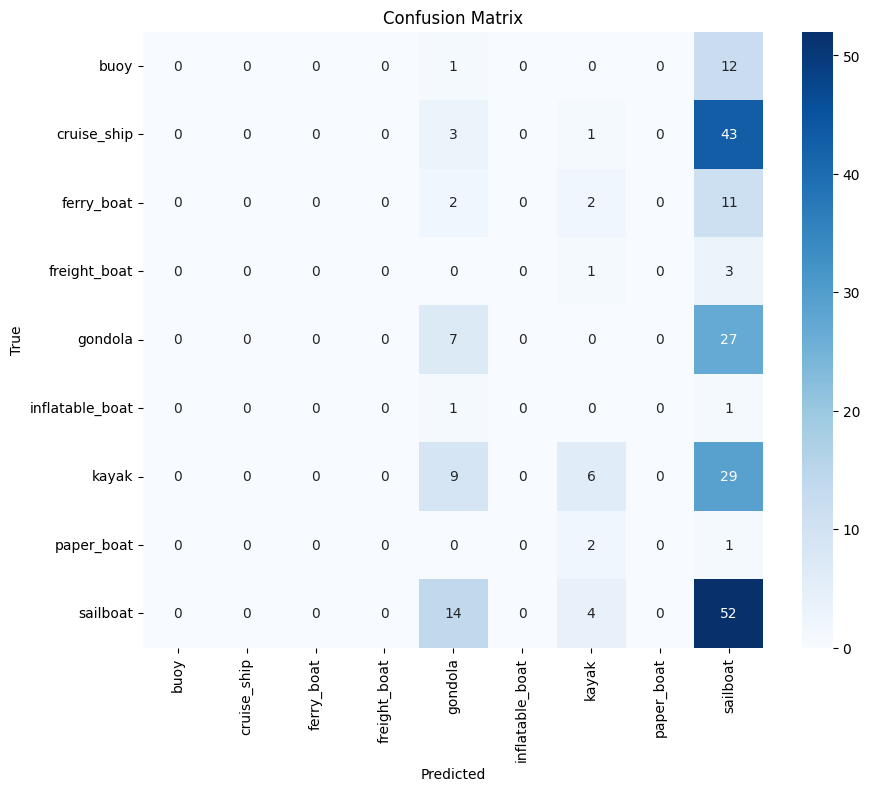

                 precision    recall  f1-score   support

           buoy       0.00      0.00      0.00        13
    cruise_ship       0.00      0.00      0.00        47
     ferry_boat       0.00      0.00      0.00        15
   freight_boat       0.00      0.00      0.00         4
        gondola       0.19      0.21      0.20        34
inflatable_boat       0.00      0.00      0.00         2
          kayak       0.38      0.14      0.20        44
     paper_boat       0.00      0.00      0.00         3
       sailboat       0.29      0.74      0.42        70

       accuracy                           0.28       232
      macro avg       0.09      0.12      0.09       232
   weighted avg       0.19      0.28      0.19       232



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# Step 1.8 : Classification Report

# Confusion Matrix
conf_mat = confusion_matrix(y_true_labels, y_pred_labels)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))


In [12]:

## STEP 2 : Create and Train Mobile deployable light model

# Create Training Dataset

# Editable Parameters
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode = 'categorical'
  )

# Create Validation Dataset

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size,
 label_mode = 'categorical'
  )

# Save Classes data before applying Normalization
num_classes = len(train_ds.class_names)
class_names = train_ds.class_names

print(f"Number of classes: {num_classes}")

# Apply normalization (Rescaling) to scale pixel values from [0, 255] to [0, 1]
normalization_layer = Rescaling(1./255)

# Normalize the datasets
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))



# Prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)



Found 1162 files belonging to 9 classes.
Using 814 files for training.
Found 1162 files belonging to 9 classes.
Using 348 files for validation.
Number of classes: 9


In [13]:
for images, labels in train_ds.take(1):
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")

Images shape: (32, 224, 224, 3)
Labels shape: (32, 9)


In [25]:
# Steps 2.4, 2.5 : Build and Compile CNN Model



model_light = Sequential([

  keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name=None,
),
  layers.GlobalAveragePooling2D(),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.1),
  layers.Dense(128, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.1),
  layers.Dense(9, activation='softmax')
])

In [26]:
## Compile Model

model_light.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','precision','recall'])

In [16]:
# Check the shapes of your data
for images, labels in train_ds.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")

# Check model output shape
logits = model_light(images)
print(f"Model output shape: {logits.shape}")

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 9)
Model output shape: (32, 9)


In [27]:
# Early Stopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [28]:
# Steps 1.6 : Train the Model

epochs=50
history_light = model_light.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = [early_stopping]
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 67s 970ms/step - accuracy: 0.4266 - loss: 1.7987 - precision: 0.6089 - recall: 0.3292 - val_accuracy: 0.4397 - val_loss: 4.5667 - val_precision: 0.4548 - val_recall: 0.4339
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.7749 - loss: 0.7365 - precision: 0.8592 - recall: 0.6964 - val_accuracy: 0.4741 - val_loss: 3.6815 - val_precision: 0.4892 - val_recall: 0.4569
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.8802 - loss: 0.4258 - precision: 0.9235 - recall: 0.8376 - val_accuracy: 0.3994 - val_loss: 5.5943 - val_precision: 0.4134 - val_recall: 0.3908
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9018 - loss: 0.2847 - precision: 0.9421 - recall: 0.8816 - val_accuracy: 0.5057 - val_loss: 3.6817 - val_precision: 0.5311 - val_recall: 0.4914
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9192 - loss: 0.2751 - precision: 0.9306 - recall: 0.8955 - val_accuracy: 0.4483 - val_loss: 3.427

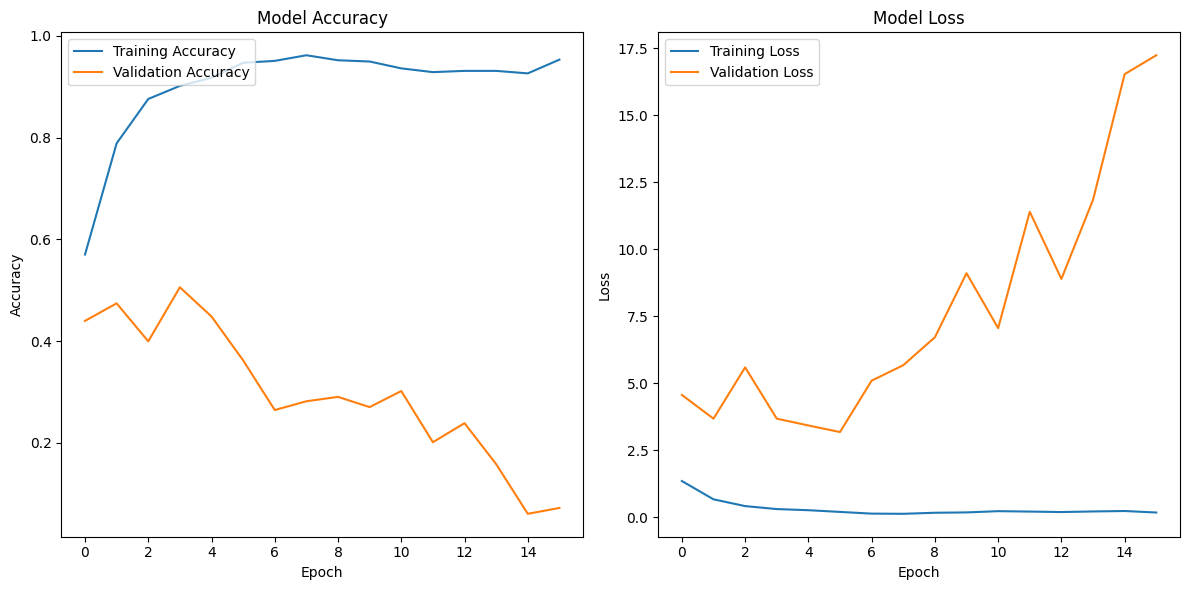

In [29]:
# Step 2.6 : Plot loss and accuracy

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_light.history['accuracy'], label='Training Accuracy')
plt.plot(history_light.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_light.history['loss'], label='Training Loss')
plt.plot(history_light.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [30]:
# Step 2.7 : Evaluate the model on the test data
test_loss, test_accuracy, test_precision, test_recall = model_light.evaluate(val_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

# Get true and predicted labels for the test set
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred = model.predict(val_ds)
y_true_labels = np.argmax(y_true, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3635 - loss: 3.1978 - precision: 0.3788 - recall: 0.3319
Test Loss: 3.1826388835906982
Test Accuracy: 0.36206895112991333
Test Precision: 0.379084974527359
Test Recall: 0.3333333432674408
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step


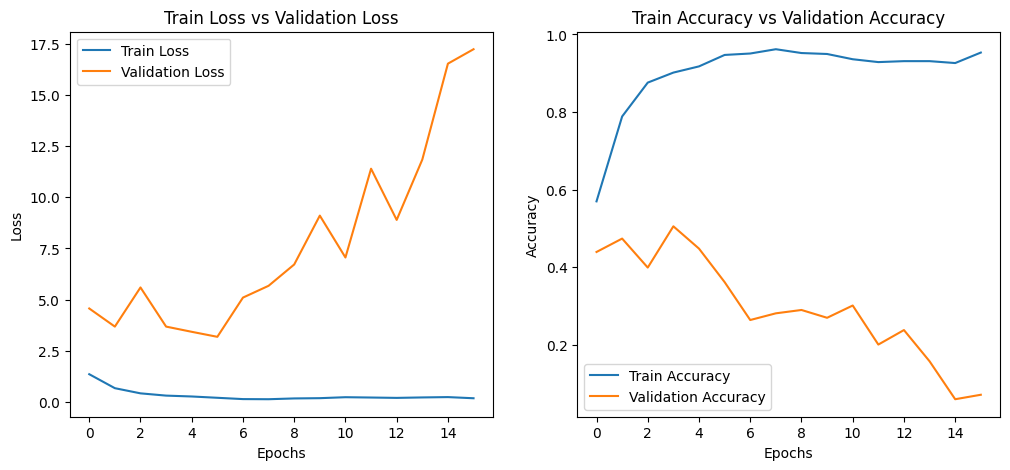

In [31]:
# Step 2.8 : Plot Train loss Vs Validation loss and Train accuracy Vs Validation accuracy.

# Retrieve the loss and accuracy values from the history object
train_loss = history_light.history['loss']
val_loss = history_light.history['val_loss']
train_acc = history_light.history['accuracy']
val_acc = history_light.history['val_accuracy']

epochs_range = range(len(train_loss))  # Number of epochs the model trained for

# Plotting Training vs Validation Loss
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 3 : OBSERVATIONS :


Deeper Model:


Strengths: It has a much lower test loss and higher precision, meaning it is more confident and accurate when it does make positive predictions.

Weaknesses: Its recall is very low, indicating that it is missing many correct classifications. It could be overfitting the training data and being too selective during inference.


Lighter Model:


Strengths: It has higher recall, which means it identifies a higher number of true boat types, and its accuracy is slightly better. It may generalize slightly better because of its simplicity.

Weaknesses: Its precision and test loss indicate that it makes many incorrect positive predictions and struggles more to capture the true patterns in the data, which could be due to underfitting.
